## Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC
from sklearn import tree

## Load CSV File

In [3]:
dataframe = pd.read_csv("loantrain.csv")

In [4]:
df = dataframe

## Exploratory Data Analysis

In [5]:
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

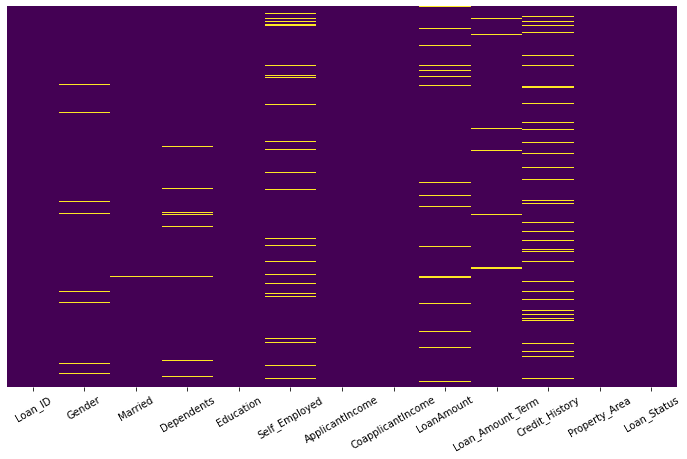

In [11]:
# missing value of the column....
plt.figure(figsize=(12,7))
hp = sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')
hp.set_xticklabels(hp.get_xticklabels() , rotation =30); 

## Finding the NULL values:-

In [12]:
print("categories of gender Column:\n",df['Gender'].value_counts())
print('Null values in Gender Column:',df['Gender'].isnull().sum())
print('---------------------------------------------------------------------------------------------------------\n')
print("categories of Married Column:\n",df['Married'].value_counts())
print('Null values in Gender column:',df['Married'].isnull().sum())
print('---------------------------------------------------------------------------------------------------------\n')
print("categories of Dependents column:\n",df['Dependents'].value_counts())
print('Null values in Dependents column:',df['Dependents'].isnull().sum())
print('---------------------------------------------------------------------------------------------------------\n')
print("categories of Self_Employed column:\n",df['Self_Employed'].value_counts())
print('Null values in Self_Employed column:',df["Self_Employed"].isnull().sum())
print('---------------------------------------------------------------------------------------------------------\n')
print('Null values in LoanAmount column:',df["LoanAmount"].isnull().sum())
print('---------------------------------------------------------------------------------------------------------\n')
print('Null values in Loan_Amount_Term column:',df["Loan_Amount_Term"].isnull().sum())
print('---------------------------------------------------------------------------------------------------------\n')
print("categories of Credit_History column:\n",df['Credit_History'].value_counts())
print('Null values in Credit_History column:',df['Credit_History'].isnull().sum())

categories of gender Column:
 Male      489
Female    112
Name: Gender, dtype: int64
Null values in Gender Column: 13
---------------------------------------------------------------------------------------------------------

categories of Married Column:
 Yes    398
No     213
Name: Married, dtype: int64
Null values in Gender column: 3
---------------------------------------------------------------------------------------------------------

categories of Dependents column:
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Null values in Dependents column: 15
---------------------------------------------------------------------------------------------------------

categories of Self_Employed column:
 No     500
Yes     82
Name: Self_Employed, dtype: int64
Null values in Self_Employed column: 32
---------------------------------------------------------------------------------------------------------

Null values in LoanAmount column: 22
-----------------------------

## Filling NULL Values..

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0] , inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df["Dependents"].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0] , inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

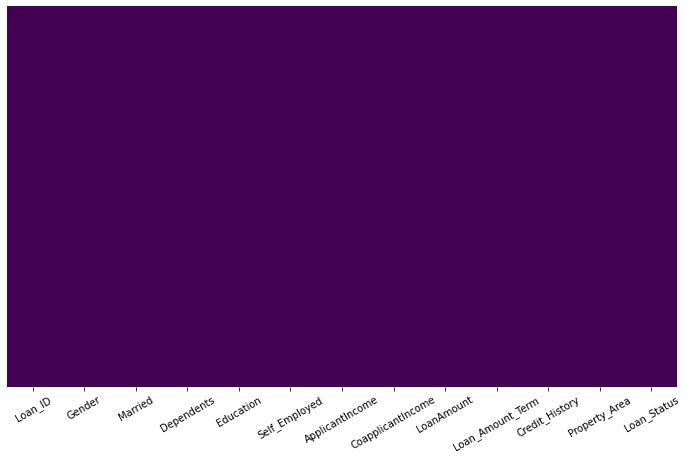

In [14]:
# now NULL values are zero..
plt.figure(figsize=(12,7))
hp= sns.heatmap(df.isnull() , yticklabels = False , cmap = 'viridis' , cbar = False)
hp.set_xticklabels(hp.get_xticklabels() , rotation =30);

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Converts Categorical Variables into Numerical

In [16]:
variable_columns = ['Gender' , 'Married' , 'Dependents' , 'Education' , 'Self_Employed' , 'Property_Area' , 'Loan_Status']

In [17]:
le = LabelEncoder()
for i in variable_columns:
    df[i] =le.fit_transform(df[i])

In [18]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

## Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

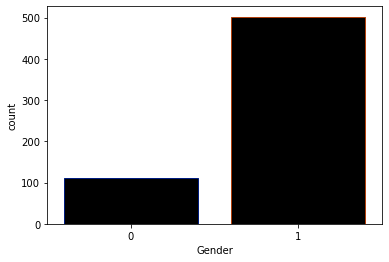

In [19]:
sns.countplot(x='Gender',color = 'k',data=df,saturation = 12, edgecolor=sns.color_palette("dark", 3))      

<AxesSubplot:xlabel='Married', ylabel='count'>

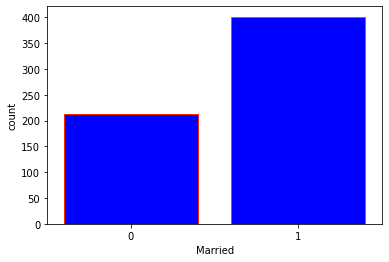

In [20]:
sns.countplot(x='Married',color = 'b',data=df,saturation = 12, edgecolor=sns.color_palette("autumn"))

<AxesSubplot:xlabel='Dependents', ylabel='count'>

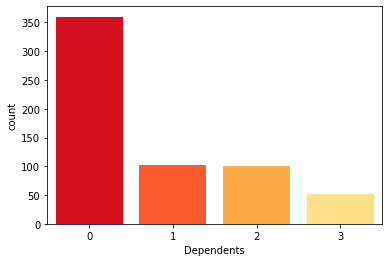

In [21]:
sns.countplot(x=variable_columns[2],color = 'k',data=df,saturation = 12,palette='YlOrRd_r')

<AxesSubplot:xlabel='Education', ylabel='count'>

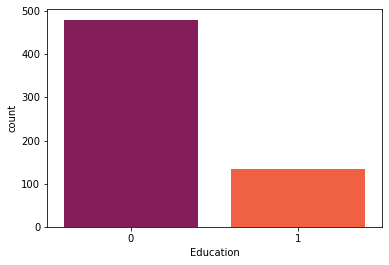

In [22]:
sns.countplot(x=variable_columns[3],color = 'k',data=df,saturation = 12,palette='rocket')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

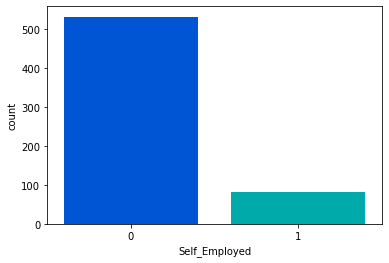

In [23]:
sns.countplot(x=variable_columns[4],color = 'k',data=df,saturation = 12,palette='winter')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

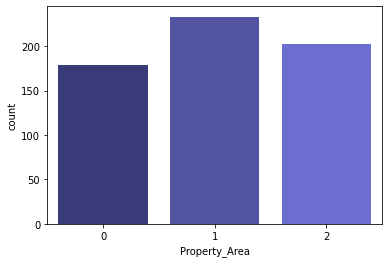

In [24]:
sns.countplot(x='Property_Area',color = 'k',data=df,saturation = 12,palette='tab20b')

<AxesSubplot:>

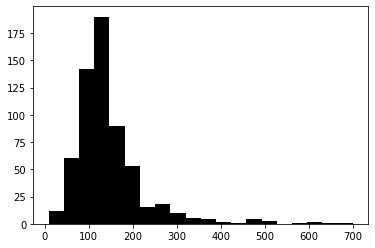

In [25]:
df["LoanAmount"].hist(bins=20 , grid = False , color ='k')

<AxesSubplot:>

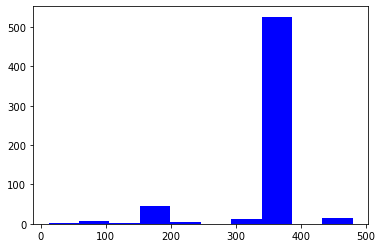

In [26]:
df["Loan_Amount_Term"].hist(bins=10 , grid = False , color ='b')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

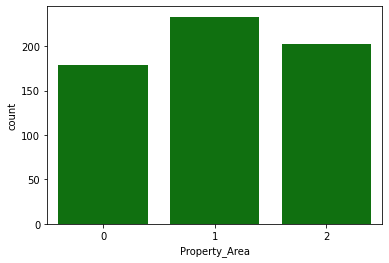

In [27]:
sns.countplot(x="Property_Area", data=df, color="g")

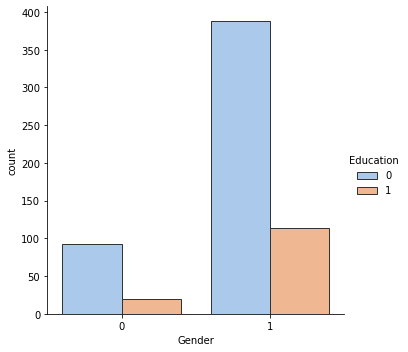

In [28]:
sns.catplot(x="Gender", hue="Education", kind="count",
            palette="pastel", edgecolor=".2",
            data=df)

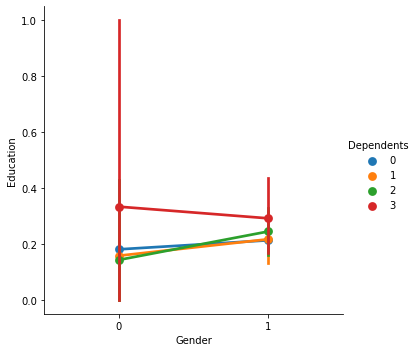

In [29]:
sns.catplot(x = 'Gender' , y = 'Education', hue = 'Dependents',kind = 'point',data=df)

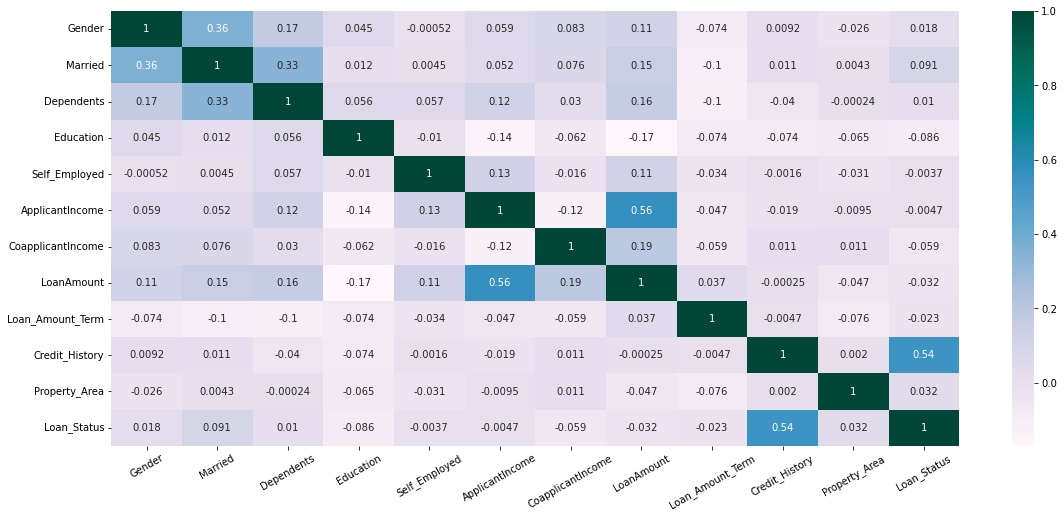

In [30]:
plt.figure(figsize=(19,8))
corr = df.corr()
hp =sns.heatmap(corr, cmap = 'PuBuGn', annot= True);
hp.set_xticklabels(hp.get_xticklabels() , rotation =30);

# Spliting of dataset in train and test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


# 

# Use Algorithm for this Model

## 1. Logistic Regression

In [33]:
pipe = make_pipeline(StandardScaler() , LogisticRegression())

In [34]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [35]:
y_pred = pipe.predict(x_test)

### Confusion Matrix

In [36]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)
conf_matrix

array([[15, 18],
       [ 2, 88]], dtype=int64)

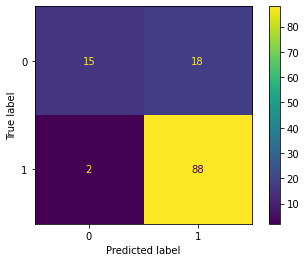

In [37]:
# Confusion Matrix
plot_confusion_matrix(pipe , x_test , y_test)
plt.show()

### Classification Report

In [38]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



### Accuracy..

In [39]:
acc = accuracy_score(y_test , y_pred)

In [40]:
print("Accuracy of this model is " , acc*100,"% with the help of LogisticRegression Algorithm.")

Accuracy of this model is  83.73983739837398 % with the help of LogisticRegression Algorithm.


# 

## 2. Support Vector Machine

In [41]:
clas = SVC(kernel = 'linear' ,random_state = 0 )

In [42]:
clas.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [43]:
y_pred = clas.predict(x_test)

### Confusion Matrix

In [44]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

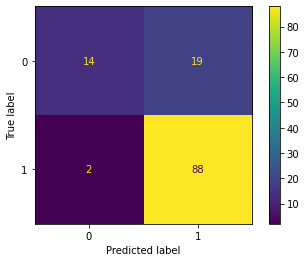

In [45]:
plot_confusion_matrix(clas , x_test , y_test)

### Classification Report

In [46]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### Accuracy

In [47]:
acc = accuracy_score(y_test, y_pred)* 100

In [48]:
print("Accuracy of this model is " , acc,"% with the help of SupportVectorClassifier Algorithm.")

Accuracy of this model is  82.92682926829268 % with the help of SupportVectorClassifier Algorithm.


# 

## 3. Naive Bayes

In [49]:
gnb = GaussianNB()

In [50]:
fit_gnb = gnb.fit(x_train, y_train)

In [51]:
y_pred_gnb = fit_gnb.predict(x_test)

### Confusion Matrix

In [52]:
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_gnb

array([[15, 18],
       [ 3, 87]], dtype=int64)

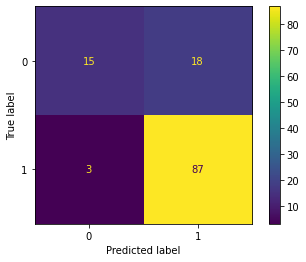

In [53]:
plot_confusion_matrix(gnb , x_test , y_test)

### Classification Report

In [54]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### Accuracy

In [55]:
acc = accuracy_score(y_test, y_pred_gnb)* 100

In [56]:
print("Accuracy of this model is " , acc,"% with the help of GaussianNB Algorithm.")

Accuracy of this model is  82.92682926829268 % with the help of GaussianNB Algorithm.


# 

## 4. K-Nearest Neighbors

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 5 , metric='minkowski' , p=2)

In [58]:
classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [59]:
y_prediction  = classifier.predict(x_test)

### Confusion Matrix

In [60]:
cn_matrix = confusion_matrix(y_test, y_pred_gnb)
cn_matrix

array([[15, 18],
       [ 3, 87]], dtype=int64)

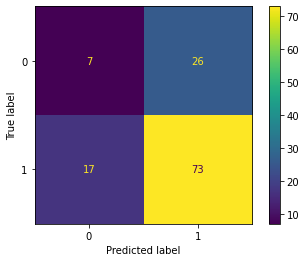

In [61]:
plot_confusion_matrix(classifier , x_test , y_test)

### Classification Report

In [62]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### Accuracy

In [63]:
acc= accuracy_score(y_test , y_prediction)

In [64]:
print("Accuracy of this model is " , acc*100,"% with the help of KNeighborsClassifier Algorithm.")

Accuracy of this model is  65.04065040650406 % with the help of KNeighborsClassifier Algorithm.


#    

## 5. Decision Tree

In [65]:
Classi = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)

In [66]:
Classi.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
y_pre = Classi.predict(x_test)

### Confusion Matrix

In [68]:
cn_matr = confusion_matrix(y_test, y_pre)
cn_matr

array([[20, 13],
       [20, 70]], dtype=int64)

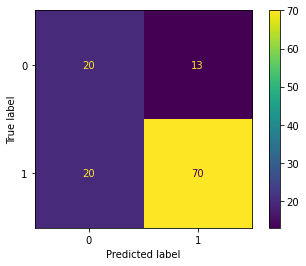

In [69]:
plot_confusion_matrix(Classi , x_test , y_test)

### Classification Report

In [70]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### Plotting

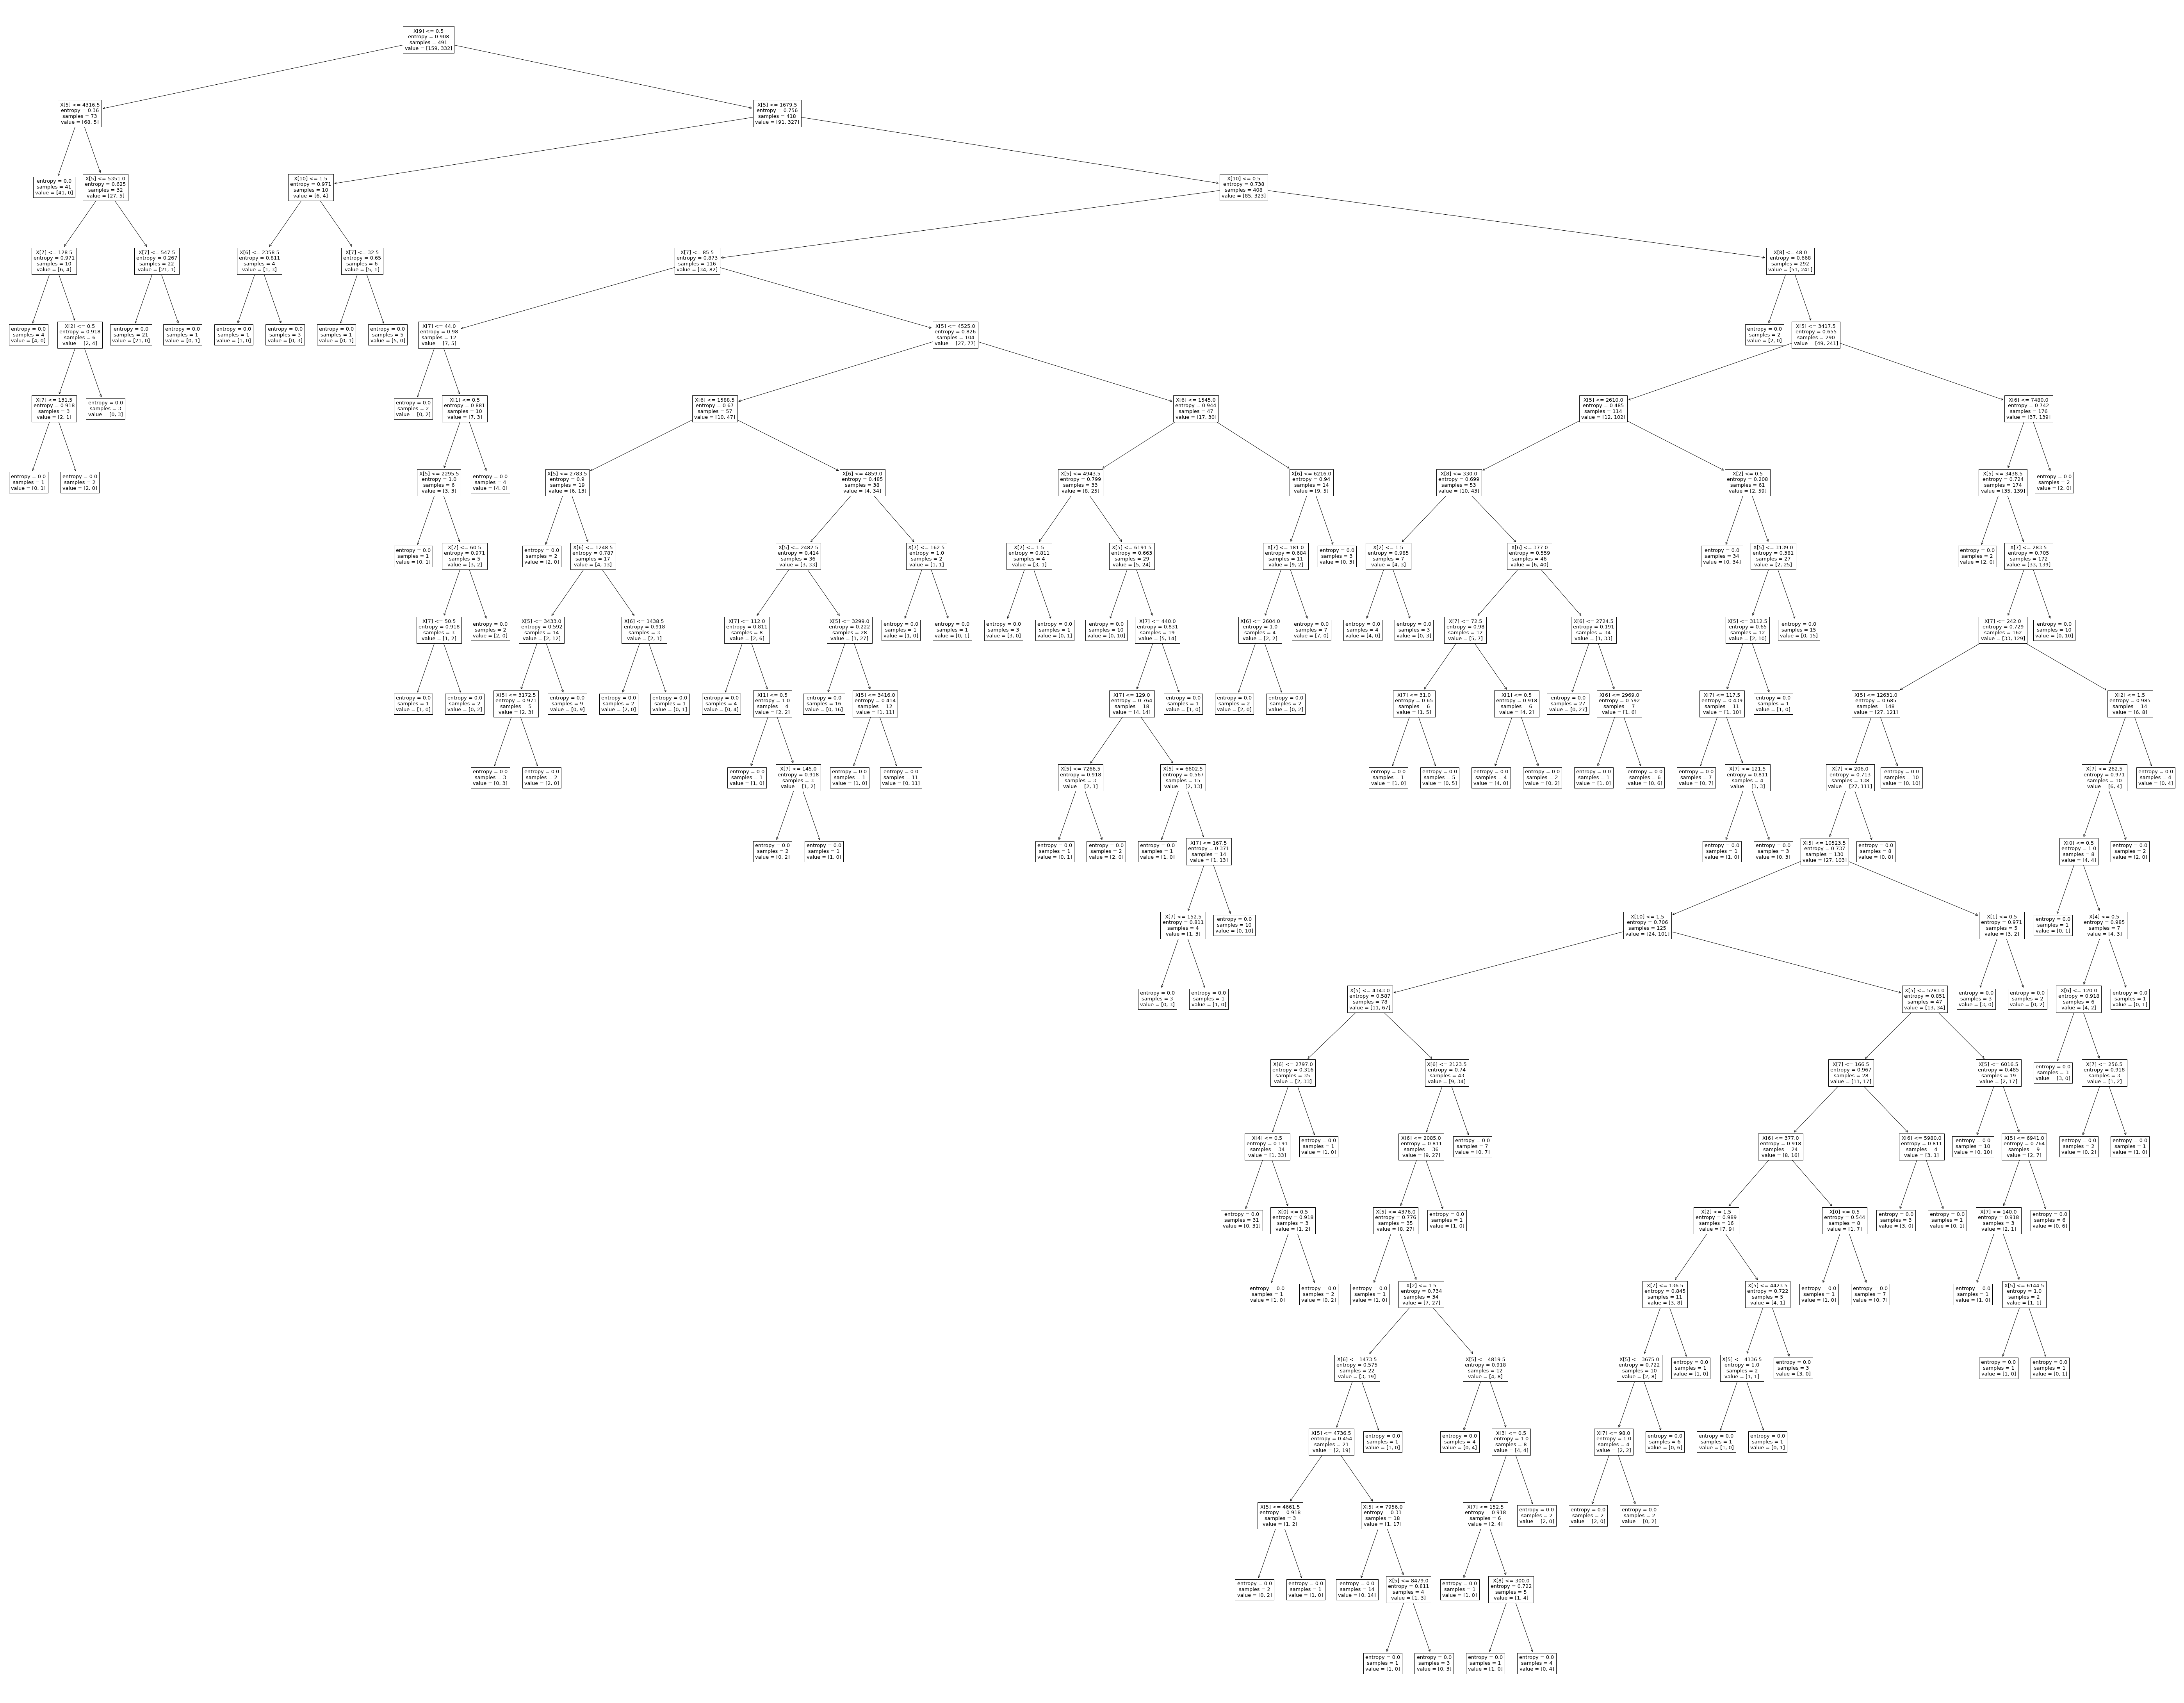

In [81]:
plt.figure(figsize = (100,80))
tree.plot_tree(Classi)
plt.show()

### Accuracy

In [72]:
accuracy_score(y_test , y_pre)

0.7317073170731707

In [73]:
print("Accuracy of this model is " , acc*100,"% with the help of DecisionTreeClassifier Algorithm.")

Accuracy of this model is  65.04065040650406 % with the help of DecisionTreeClassifier Algorithm.


#    

## 6. Random Forest

In [74]:
classifi= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifi.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [75]:
y_predi= classifi.predict(x_test)  

### Confusion Matrix

In [76]:
con_mat = confusion_matrix(y_test , y_predi)
con_mat

array([[16, 17],
       [16, 74]], dtype=int64)

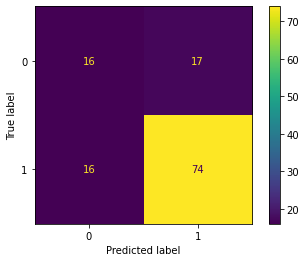

In [77]:
plot_confusion_matrix(classifi, x_test , y_test)

### Classification Report

In [78]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### Accuracy

In [79]:
acc=accuracy_score(y_test , y_predi)

In [80]:
print("Accuracy of this model is " , acc*100,"% with the help of RandomForestClassifier Algorithm.")

Accuracy of this model is  73.17073170731707 % with the help of RandomForestClassifier Algorithm.
